In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


**Загрузим датасет и проверим на наличие пустых значений.**

In [24]:
train=pd.read_csv('C:/Program Files/PostgreSQL/15/data/supermarket_sales.csv', delimiter=',')
df=pd.DataFrame(train)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Нулевые значения отсутствуют.**

**Исключим из обучающей выборки признаки не подходящие для обучения по показателю корреляции и по "Продуктовому признаку".**

In [26]:
df=df.drop('Invoice ID', axis=1)

In [27]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df['weekday'] = pd.DatetimeIndex(df['Date']).weekday

In [28]:
df=df.drop(['Date','Time'], axis=1)

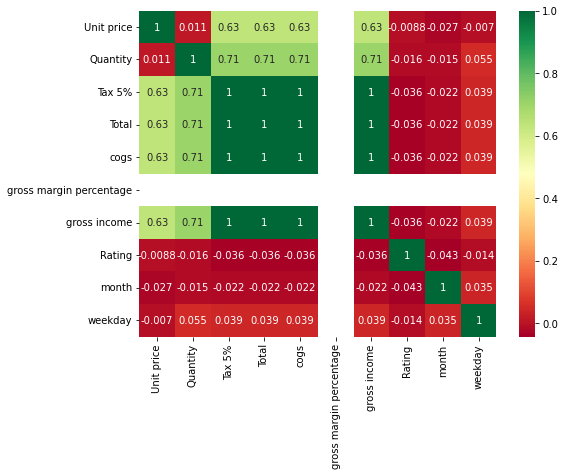

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', ax=ax)
plt.show()

In [30]:
df=df.drop(['Rating','Branch'], axis=1)

In [31]:
df=df.drop(['Tax 5%', 'Total', 'cogs','gross income', 'gross margin percentage'], axis=1)

In [32]:
y=df['Quantity']
X=df.drop('Quantity',axis=1)

In [33]:
X.head()

,City,Customer type,Gender,Product line,Unit price,Payment,month,weekday
0,Yangon,Member,Female,Health and beauty,74.69,Ewallet,1,5
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,Cash,3,4
2,Yangon,Normal,Male,Home and lifestyle,46.33,Credit card,3,6
3,Yangon,Member,Male,Health and beauty,58.22,Ewallet,1,6
4,Yangon,Normal,Male,Sports and travel,86.31,Ewallet,2,4


**Приведем категориальные признаки к числовому формату и сформируем обучающую и тестовую выборки.**

In [34]:
X=pd.get_dummies(X)
X.head()

,Unit price,month,weekday,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,1,5,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,15.28,3,4,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,46.33,3,6,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,58.22,1,6,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
4,86.31,2,4,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

**Обучим модель используя метод дерева решений и посчитаем показатели качества обучения модели.**

In [36]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
yp=regr.predict(X_test)

In [37]:
r2_score(y_test,yp)

-1.1250672249247233

In [38]:
rmse = math.sqrt(mean_squared_error(y_test,yp))
rmse

4.181506905411014

**Обучим модель используя метод бустинга и посчитаем показатели качества обучения модели.**

In [39]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
yp=regr.predict(X_test)

In [40]:
r2_score(y_test,yp)

-0.034324133240412946

In [41]:
rmse = math.sqrt(mean_squared_error(y_test,yp))
rmse

2.9172578066051664

**Сохраним модель, показавщую наилучшие результаты для использования в аналитике.**

In [42]:
from joblib import dump
dump(regr, 'diploma_model.joblib')

['diploma_model.joblib']